In [2]:
from Metaheuristicas.fitness_functions import *


In [3]:
X, y = load_and_preprocess_data(filename='Resources/SeisBenchV1_v1_1.json')


In [4]:
from Metaheuristicas.Genetico import genetic_algorithm

mutation = 0.1
crossover = 0.9

In [8]:
import pandas as pd
from IPython.display import display, clear_output

# Step 1: Initialize empty DataFrames for each classifier with metrics as columns
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

naive_bayes_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
random_forest_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
neural_network_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])

# Display all tables function
def display_tables():
    clear_output(wait=True)
    print("Naive Bayes Results")
    display(naive_bayes_df)
    print("Random Forest Results")
    display(random_forest_df)
    print("Neural Network Results")
    display(neural_network_df)

In [7]:
def add_result(classifier, fitness_function, accuracy, precision, recall, f1_score, auc):
    new_data = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score,
        "AUC": auc
    }

    if classifier == "Naive Bayes":
        global naive_bayes_df
        naive_bayes_df.loc[fitness_function] = new_data
    elif classifier == "Random Forest":
        global random_forest_df
        random_forest_df.loc[fitness_function] = new_data
    elif classifier == "Neural Network":
        global neural_network_df
        neural_network_df.loc[fitness_function] = new_data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def confusion_matrix_heatmap(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

#### Models Naive Bayes and Decision Tree

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
DT = RandomForestClassifier()

#dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Genetic with Mutual Information


In [9]:
best_solution, best_Gfitness = genetic_algorithm(X, y, mutation_rate=mutation, crossover_rate=crossover,fitness_function=mutual_information_eval, generations=600)


GRMIFeatures = X.columns[best_solution.astype(bool)].tolist()



Generation 1/600
Generation 2/600
Generation 3/600
Generation 4/600
Generation 5/600
Generation 6/600
Generation 7/600
Generation 8/600
Generation 9/600
Generation 10/600
Generation 11/600
Generation 12/600
Generation 13/600
Generation 14/600
Generation 15/600
Generation 16/600
Generation 17/600
Generation 18/600
Generation 19/600
Generation 20/600
Generation 21/600
Generation 22/600
Generation 23/600
Generation 24/600
Generation 25/600
Generation 26/600
Generation 27/600
Generation 28/600
Generation 29/600
Generation 30/600
Generation 31/600
Generation 32/600
Generation 33/600
Generation 34/600
Generation 35/600
Generation 36/600
Generation 37/600
Generation 38/600
Generation 39/600
Generation 40/600
Generation 41/600
Generation 42/600
Generation 43/600
Generation 44/600
Generation 45/600
Generation 46/600
Generation 47/600
Generation 48/600
Generation 49/600
Generation 50/600
Generation 51/600
Generation 52/600
Generation 53/600
Generation 54/600
Generation 55/600
Generation 56/600
G

In [10]:
NB.fit(X_train[GRMIFeatures], y_train)

y_pred = NB.predict(X_test[GRMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))


Accuracy: 0.9477351916376306
Precision: 0.5833333333333334
Recall: 0.7368421052631579
F1: 0.6511627906976745
AUC: 0.8497643362136685


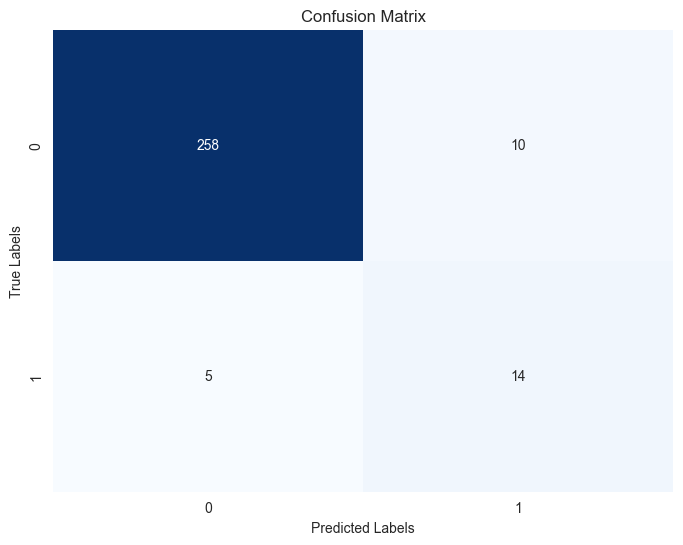

In [11]:
confusion_matrix_heatmap(y_test, y_pred)

In [12]:
DT.fit(X_train[GRMIFeatures], y_train)

y_pred = DT.predict(X_test[GRMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9616724738675958
Precision: 0.7222222222222222
Recall: 0.6842105263157895
F1: 0.7027027027027027
AUC: 0.8327769049489395


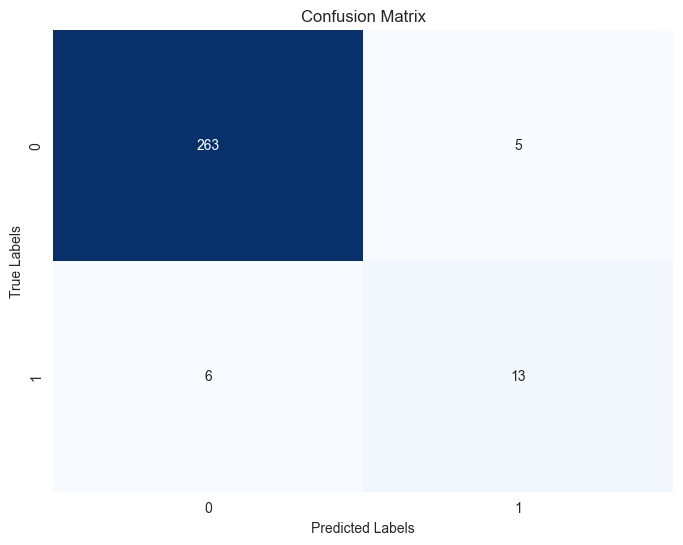

In [13]:
confusion_matrix_heatmap(y_test, y_pred)

# Genetic with Chi2

In [14]:
best_solution, best_Gfitness = genetic_algorithm(X, y, mutation_rate=mutation, crossover_rate=crossover,fitness_function=chi2_eval, generations=500)


GRX2Features = X.columns[best_solution.astype(bool)].tolist()

Generation 1/500
Generation 2/500
Generation 3/500
Generation 4/500
Generation 5/500
Generation 6/500
Generation 7/500
Generation 8/500
Generation 9/500
Generation 10/500
Generation 11/500
Generation 12/500
Generation 13/500
Generation 14/500
Generation 15/500
Generation 16/500
Generation 17/500
Generation 18/500
Generation 19/500
Generation 20/500
Generation 21/500
Generation 22/500
Generation 23/500
Generation 24/500
Generation 25/500
Generation 26/500
Generation 27/500
Generation 28/500
Generation 29/500
Generation 30/500
Generation 31/500
Generation 32/500
Generation 33/500
Generation 34/500
Generation 35/500
Generation 36/500
Generation 37/500
Generation 38/500
Generation 39/500
Generation 40/500
Generation 41/500
Generation 42/500
Generation 43/500
Generation 44/500
Generation 45/500
Generation 46/500
Generation 47/500
Generation 48/500
Generation 49/500
Generation 50/500
Generation 51/500
Generation 52/500
Generation 53/500
Generation 54/500
Generation 55/500
Generation 56/500
G

In [15]:
NB.fit(X_train[GRX2Features], y_train)
y_pred = NB.predict(X_test[GRX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9512195121951219
Precision: 0.6
Recall: 0.7894736842105263
F1: 0.6818181818181818
AUC: 0.8760801256873527


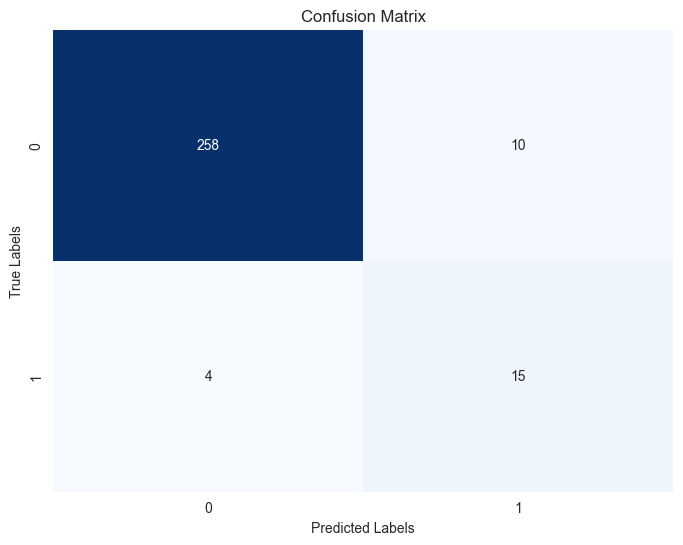

In [16]:
confusion_matrix_heatmap(y_test, y_pred)

In [17]:
DT.fit(X_train[GRX2Features], y_train)
y_pred = DT.predict(X_test[GRX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9651567944250871
Precision: 0.7647058823529411
Recall: 0.6842105263157895
F1: 0.7222222222222222
AUC: 0.8346425765907304


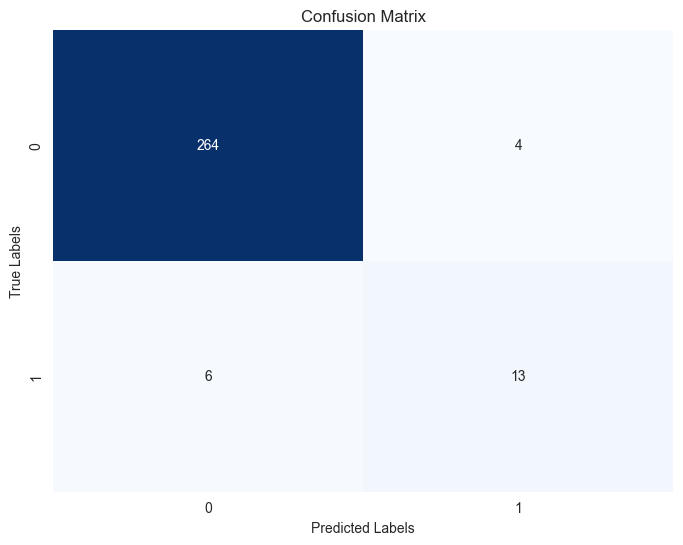

In [18]:
confusion_matrix_heatmap(y_test, y_pred)

# Genetic with ReliefF

In [19]:
best_solution, best_Gfitness = genetic_algorithm(X, y, mutation_rate=mutation, crossover_rate=crossover,fitness_function=relieff_eval, generations=550)


GRRFFeatures = X.columns[best_solution.astype(bool)].tolist()

Generation 1/550
Generation 2/550
Generation 3/550
Generation 4/550
Generation 5/550
Generation 6/550
Generation 7/550
Generation 8/550
Generation 9/550
Generation 10/550
Generation 11/550
Generation 12/550
Generation 13/550
Generation 14/550
Generation 15/550
Generation 16/550
Generation 17/550
Generation 18/550
Generation 19/550
Generation 20/550
Generation 21/550
Generation 22/550
Generation 23/550
Generation 24/550
Generation 25/550
Generation 26/550
Generation 27/550
Generation 28/550
Generation 29/550
Generation 30/550
Generation 31/550
Generation 32/550
Generation 33/550
Generation 34/550
Generation 35/550
Generation 36/550
Generation 37/550
Generation 38/550
Generation 39/550
Generation 40/550
Generation 41/550
Generation 42/550
Generation 43/550
Generation 44/550
Generation 45/550
Generation 46/550
Generation 47/550
Generation 48/550
Generation 49/550
Generation 50/550
Generation 51/550
Generation 52/550
Generation 53/550
Generation 54/550
Generation 55/550
Generation 56/550
G

In [20]:
NB.fit(X_train[GRRFFeatures], y_train)
y_pred = NB.predict(X_test[GRRFFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9512195121951219
Precision: 0.6190476190476191
Recall: 0.6842105263157895
F1: 0.65
AUC: 0.8271798900235664


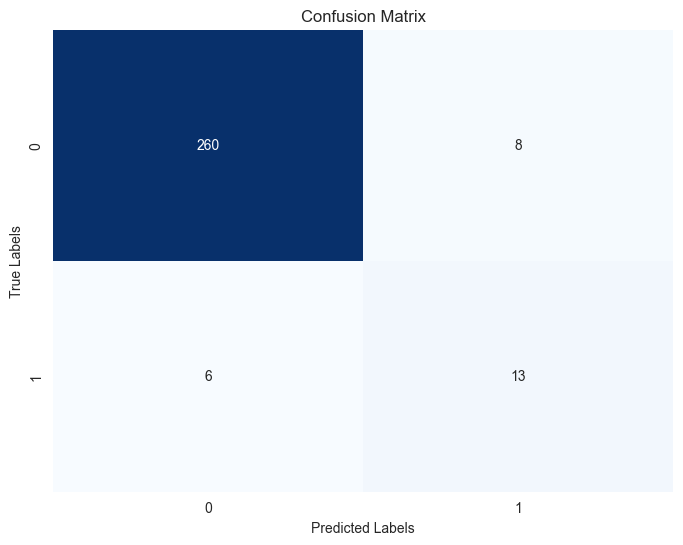

In [21]:
confusion_matrix_heatmap(y_test, y_pred)

In [22]:
DT.fit(X_train[GRRFFeatures], y_train)
y_pred = DT.predict(X_test[GRRFFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9616724738675958
Precision: 0.75
Recall: 0.631578947368421
F1: 0.6857142857142857
AUC: 0.8083267871170463


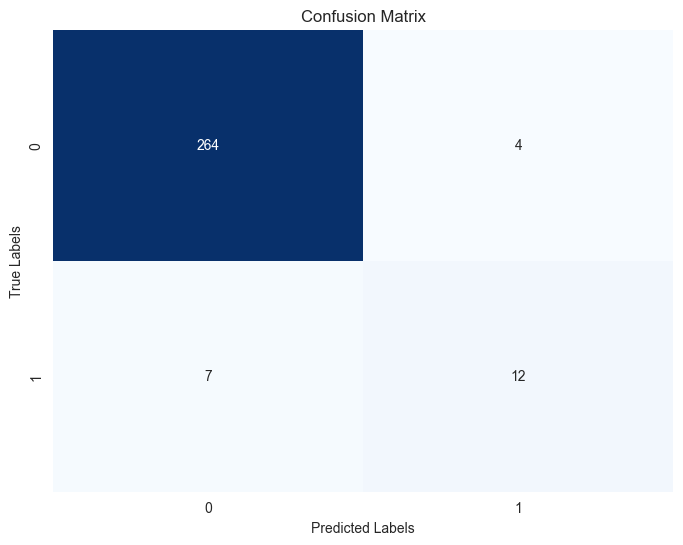

In [23]:
confusion_matrix_heatmap(y_test, y_pred)

## Red Neuronal


In [33]:
print("Features selected by MI: ", GRMIFeatures)
print("Features selected by X2: ", GRX2Features)
print("Features selected by ReliefF: ", GRRFFeatures)


Features selected by MI:  ['f2_t_std', 'f3_t_var', 'f5_t_kurtosis', 'f6_t_multiscaleEntropy', 'f7_t_time2peak', 'f9_t_peak2peak', 'f11_t_energy', 'f12_t_zcr', 'f14_f_peaks_pos_1', 'f15_f_90_percent_energy', 'f17_f_mean', 'f18_f_std', 'f19_f_var', 'f20_f_energy', 'f21_f_kurtosis', 'f22_f_multiscaleEntropy', 'f23_f_peak_1020_value', 'f25_f_peak_2030_value', 'f27_f_rms', 'f30_f_PeaksAboveRMSDensity_fun', 'f32_f_peaks_pos_2', 'f34_f_peaks_pos_3', 'f36_w_f_maxval_D1', 'f37_w_f_maxval_D2', 'f38_w_f_maxval_D3', 'f40_w_f_maxval_D5', 'f42_w_f_maxpos_A6', 'f43_w_f_maxpos_D2', 'f44_w_f_maxpos_D3', 'f46_w_f_maxpos_D5', 'f48_w_f_mean_A6', 'f50_w_f_mean_D2', 'f51_w_f_mean_D3', 'f52_w_f_mean_D4', 'f55_w_t_meanEnergyAD', 'f58_w_t_PEC_D2', 'f60_w_t_PEC_D4', 'f61_w_t_PEC_D5', 'f62_w_t_PEC_D6', 'f63_w_t_rms_A6', 'f64_w_t_rms_D1', 'f65_w_t_rms_D2', 'f67_w_t_rms_D4', 'f68_w_t_rms_D5', 'f71_w_t_peak2peak_D1', 'f72_w_t_peak2peak_D2', 'f73_w_t_peak2peak_D3', 'f74_w_t_peak2peak_D4', 'f76_w_t_peak2peak_D6', 'f7

In [24]:
print("Features selected by MI: ", len(GRMIFeatures))
print("Features selected by X2: ", len(GRX2Features))
print("Features selected by ReliefF: ", len(GRRFFeatures))

Features selected by MI:  55
Features selected by X2:  30
Features selected by ReliefF:  29


In [25]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

MUTUAL_INFORMATION 

In [26]:

RN = Sequential()

input_dim = X_train[GRMIFeatures].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[GRMIFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[GRMIFeatures], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[GRMIFeatures])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))
add_result("Neural Network", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8096 - loss: 0.5393 - val_accuracy: 0.9186 - val_loss: 0.2676
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9050 - loss: 0.2921 - val_accuracy: 0.9186 - val_loss: 0.2284
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9049 - loss: 0.2394 - val_accuracy: 0.9186 - val_loss: 0.1924
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9109 - loss: 0.2040 - val_accuracy: 0.9302 - val_loss: 0.1534
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9420 - loss: 0.1663 - val_accuracy: 0.9302 - val_loss: 0.1313
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9426 - loss: 0.1234 - val_accuracy: 0.9477 - val_loss: 0.1054
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9568 - loss: 0.1072 - val_accuracy: 0.9419 - val_loss: 0.0952
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9654 - loss: 0.1004 - val_accuracy: 0.9535 - v

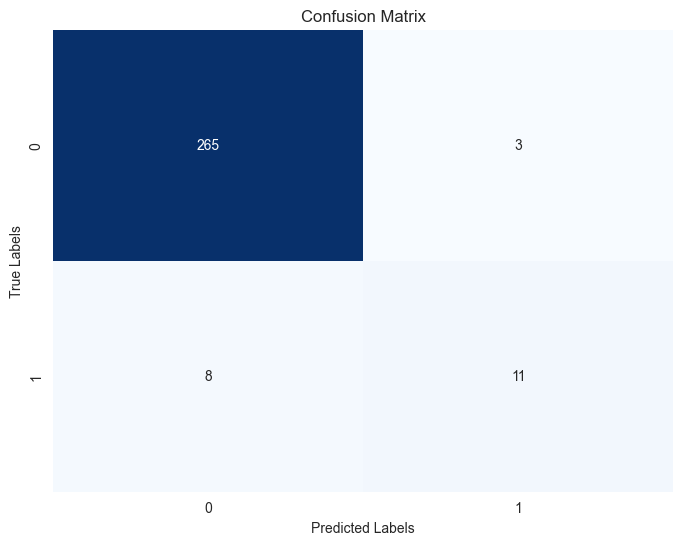

In [27]:
confusion_matrix_heatmap(y_test, y_pred)

CHI2

In [28]:

RN = Sequential()

input_dim = X_train[GRX2Features].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[GRX2Features], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[GRX2Features], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[GRX2Features])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))
add_result("Neural Network", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))

Epoch 1/100


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7390 - loss: 0.5668 - val_accuracy: 0.9186 - val_loss: 0.2826
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8809 - loss: 0.3560 - val_accuracy: 0.9186 - val_loss: 0.2363
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9016 - loss: 0.2565 - val_accuracy: 0.9186 - val_loss: 0.1996
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9214 - loss: 0.1895 - val_accuracy: 0.9302 - val_loss: 0.1575
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9242 - loss: 0.1650 - val_accuracy: 0.9360 - val_loss: 0.1278
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9531 - loss: 0.1247 - val_accuracy: 0.9477 - val_loss: 0.1127
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9607 - loss: 0.0979 - val_accuracy: 0.9419 - val_loss: 0.1008
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9483 - loss: 0.1054 - val_accuracy: 0.9477 - val_loss: 0.0

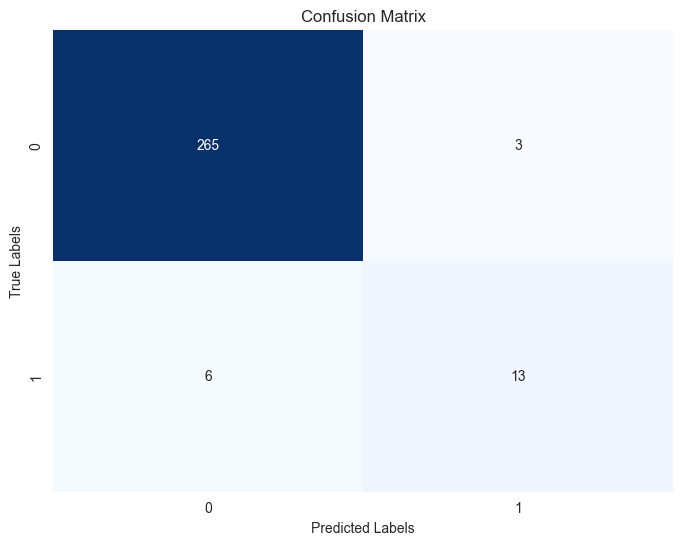

In [29]:
confusion_matrix_heatmap(y_test, y_pred)

RELIEFF

In [30]:
RN = Sequential()

input_dim = X_train[GRRFFeatures].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[GRRFFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[GRRFFeatures], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[GRRFFeatures])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob)) 
add_result("Neural Network", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))

Epoch 1/100


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8591 - loss: 0.5314 - val_accuracy: 0.9186 - val_loss: 0.3031
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8986 - loss: 0.3399 - val_accuracy: 0.9186 - val_loss: 0.2532
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9027 - loss: 0.2841 - val_accuracy: 0.9186 - val_loss: 0.2234
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8984 - loss: 0.2528 - val_accuracy: 0.9186 - val_loss: 0.1836
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9164 - loss: 0.2102 - val_accuracy: 0.9302 - val_loss: 0.1508
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9314 - loss: 0.1655 - val_accuracy: 0.9360 - val_loss: 0.1263
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9517 - loss: 0.1278 - val_accuracy: 0.9477 - val_loss: 0.1109
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9497 - loss: 0.1265 - val_accuracy: 0.9535 - val_loss: 0.1

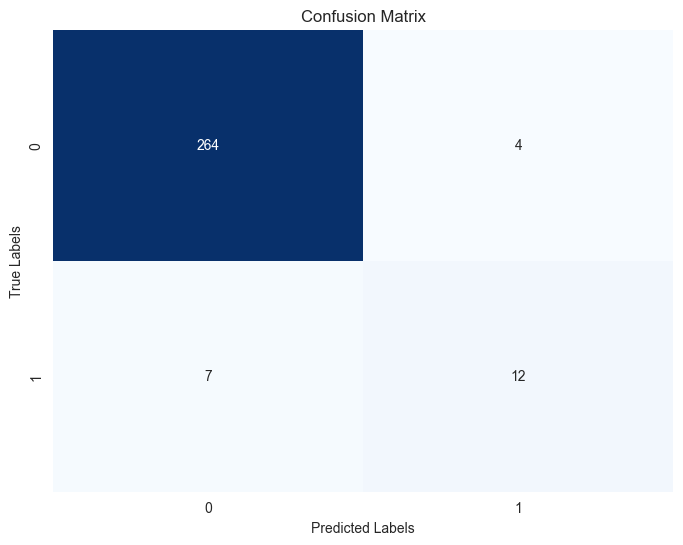

In [31]:
confusion_matrix_heatmap(y_test, y_pred)

In [32]:
display_tables()

Naive Bayes Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.947735,0.583333,0.736842,0.651163,0.849764
X2,0.95122,0.6,0.789474,0.681818,0.87608
Relief,0.95122,0.619048,0.684211,0.65,0.82718


Random Forest Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.961672,0.722222,0.684211,0.702703,0.832777
X2,0.965157,0.764706,0.684211,0.722222,0.834643
Relief,0.961672,0.75,0.631579,0.685714,0.808327


Neural Network Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.961672,0.785714,0.578947,0.666667,0.973291
X2,0.968641,0.8125,0.684211,0.742857,0.979183
Relief,0.961672,0.75,0.631579,0.685714,0.971131
